In [1]:
import osmnx as ox
import geopandas
import matplotlib.pyplot as plt

In [2]:
postal_code_zip = 34131

place = "Kassel, Germany"

tags = {"boundary":"postal_code", "postal_code":"*"}

In [7]:
kassel_data_1 = ox.geocode_to_gdf("Kassel", which_result=None)
kassel_data_1


,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((9.35102 51.30713, 9.35118 51.3...",51.369403,51.260381,9.570084,9.351023,153810105,relation,62598,51.315455,9.49241,boundary,administrative,12,0.623671,city,Kassel,"Kassel, Hesse, Germany"


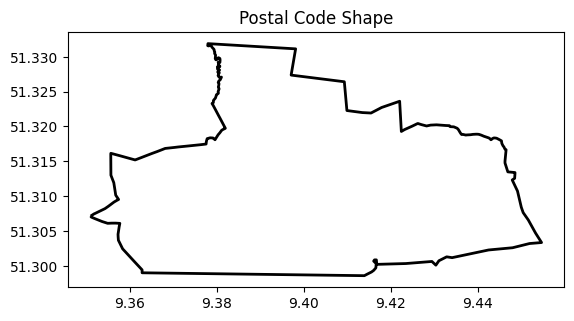

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [26]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

def extract_zip_geometry(city_polygon, tags):
    """
    Extracts the geometry information for a specific OSM feature.

    Parameters:
    - city_polygon (shapely.geometry.Polygon or shapely.geometry.MultiPolygon): Geographic boundaries of the city.
    - tags (dict): Dict of tags used for finding elements in the selected area.

    Returns:
    - gdf (geopandas.GeoDataFrame): GeoDataFrame containing the extracted geometry.
    """
    osm_features = ox.features.features_from_polygon(city_polygon, tags)
    
    # Extract only the geometry information
    if not osm_features.empty:
        return gpd.GeoDataFrame(geometry=osm_features['geometry'])
    else:
        return gpd.GeoDataFrame()

def plot_zip_code(zip_geometry_df):
    """
    Plots the boundary of a postal code area.

    Parameters:
    - zip_geometry_df (geopandas.GeoDataFrame): GeoDataFrame representing a postal code area.

    Returns:
    - None
    """
    zip_geometry_df.boundary.plot(color="black", linewidth=2)
    plt.title("Postal Code Shape")
    plt.gca().set_facecolor('white')
    plt.show()

def main():
    # Target variables
    target_postal_code = "34131"
    target_country = "Germany"
    target_city = "Kassel"

    # Define the polygon for the specified city and country
    city_polygon = ox.geocode_to_gdf({"city": target_city, "country": target_country}).unary_union

    # Get features within the polygon for the specified postal code
    search_tags = {"postal_code": target_postal_code}
    postal_code_geometry = extract_zip_geometry(city_polygon, search_tags)

    if not postal_code_geometry.empty:
        plot_zip_code(postal_code_geometry)
    else:
        print(f"No features found for the specified postal code {target_postal_code} in {target_country}. Please check the postal code and try again.")

# Call the main function
main()
